# <center>SAE15 : Traiter les données :</center>


### Notre planing pour la réalisation de la SAE (diagramme de PERT vu en gestion de projet) : ###

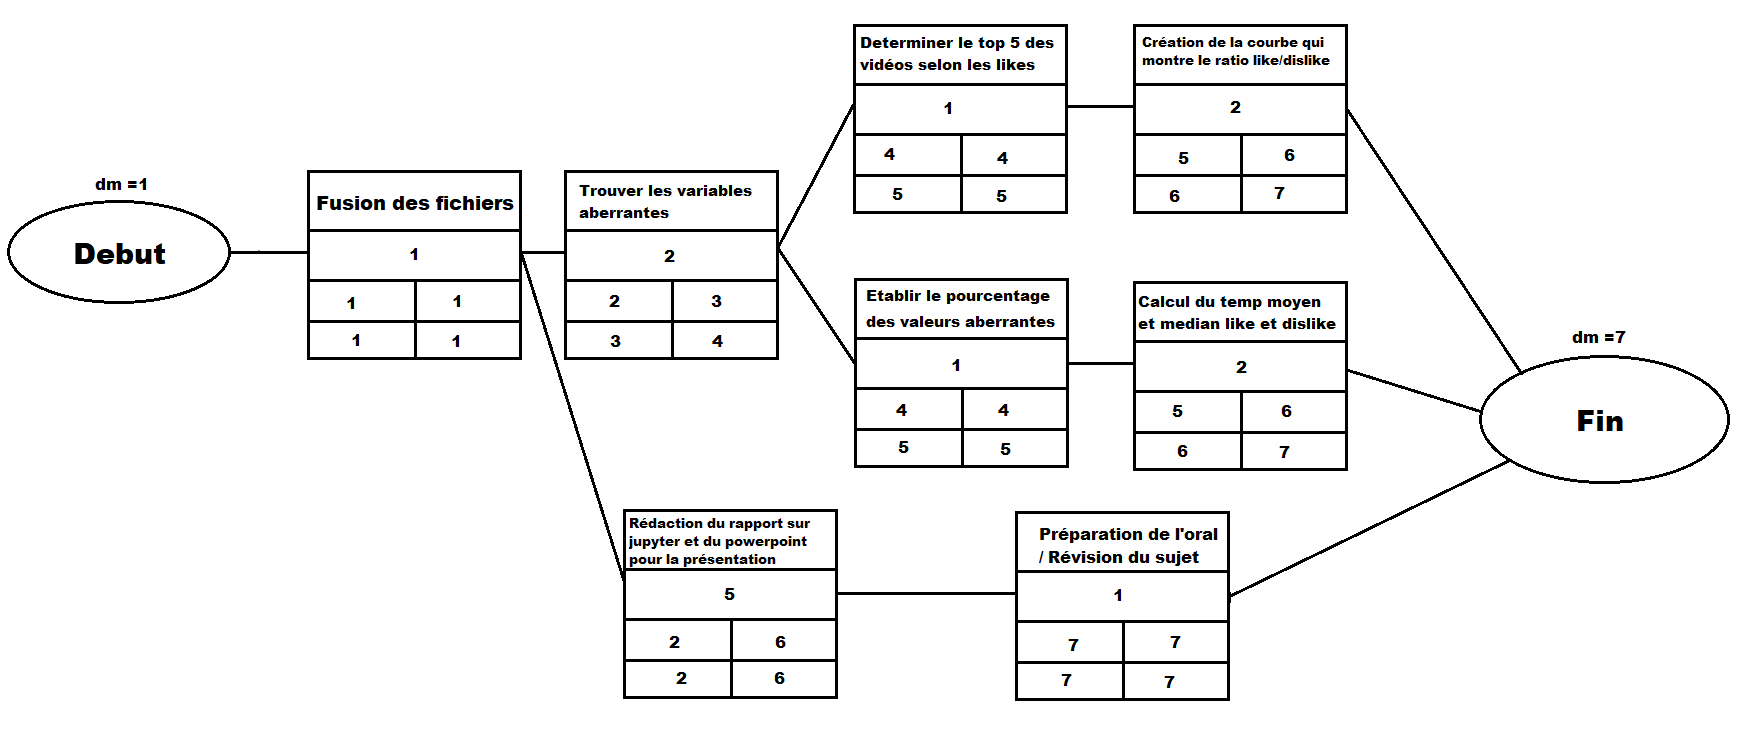

### Les quelques consignes et sinopsis : 

__Les tâches demandées dans ce projet sont les suivantes:__
- Écrire un programme qui fusionne les fichiers csv (dossier src/data).
- Établir pour chaque variable le nombre de valeurs manquantes et aberrante ainsi que le pourcentage que cela représente.
- Établir le nombre et le pourcentage d'observations qui ont des valeurs aberrantes et/ou manquantes.
- Détermine (src/model/model.py) le top 5 des vidéos qui ont le plus de likes.
- Définir les fonctions ComputeMean et ComputeMedian et calculer (src/model/model.py) le temps médian et moyen de likes et dislikes de toutes les vidéos.
- Afficher la courbe qui montre le nombre de vidéos qui ont plus de likes que de dislikes et le nombre de vidéos dans le cas inverse.

__Première étape: Création du GitHub:__

Pour crée notre GitHub nous avons suivis les étapes classiques, nous avons nommé ce projet "Sae15" et nous y avons déplacé nos différentes data récupéré au préalable sur moodle.
Après avoir tout transférer, nous nous sommes partagé les fichiers afin de travailler ensemble.

__Seconde étape: Création d'un code de fusion:__

Pour fusionner nos différents fichiers nommées youtube-1/5, nous avions pour tâche de crée un code pour lier toutes nos données en un seul fichiers pour y avoir accès plus facilement et les traiter plus facilement. Ci-dessous le code utilisé afin de creer un fichier Final.csv qui regroupe toutes nos données de façon propre, ouvrable dans un tableur excel.
    

```python
# importation des modules.
import pandas as pd
import glob
import os

# liaison des fichiers csv
joined_files = os.path.join('U:\Documents\TESTCSV', "youtube*.csv")

# une liste des fichiers est retournée
joined_list = glob.glob(joined_files)

# le fichier final csv est créer à partir de la liste.
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
print(df)
export_csv = df.to_csv ('Final.csv', index=None, header=True, encoding='utf-8', sep=',')
```

Le code que nous avons crée importe le module pandas, qui va nous permettre de créer un tableau interne à partir des fichiers csv qu'on lui donne (en définissant un chemin d'accès et le nom des fichiers, par exemple nous avons utilisé "youtube*.csv" ce qui signfie tous les fichiers commençant par youtube et finissant en .csv. Le séparateur utilisé dans nos fichiers étant la virgule, il est important de le préciser dans le code. Il va ensuite à partir de ces fichiers créer un seul et unique tableau, que l'on va exporter sous  format csv, encodé en UTF-8 car il comprends des alphabets différents et des émoticônes, texte non supporté en ASCII par exemple.

## Voici un aperçu du fichier Final.csv que nous avons obtenu:

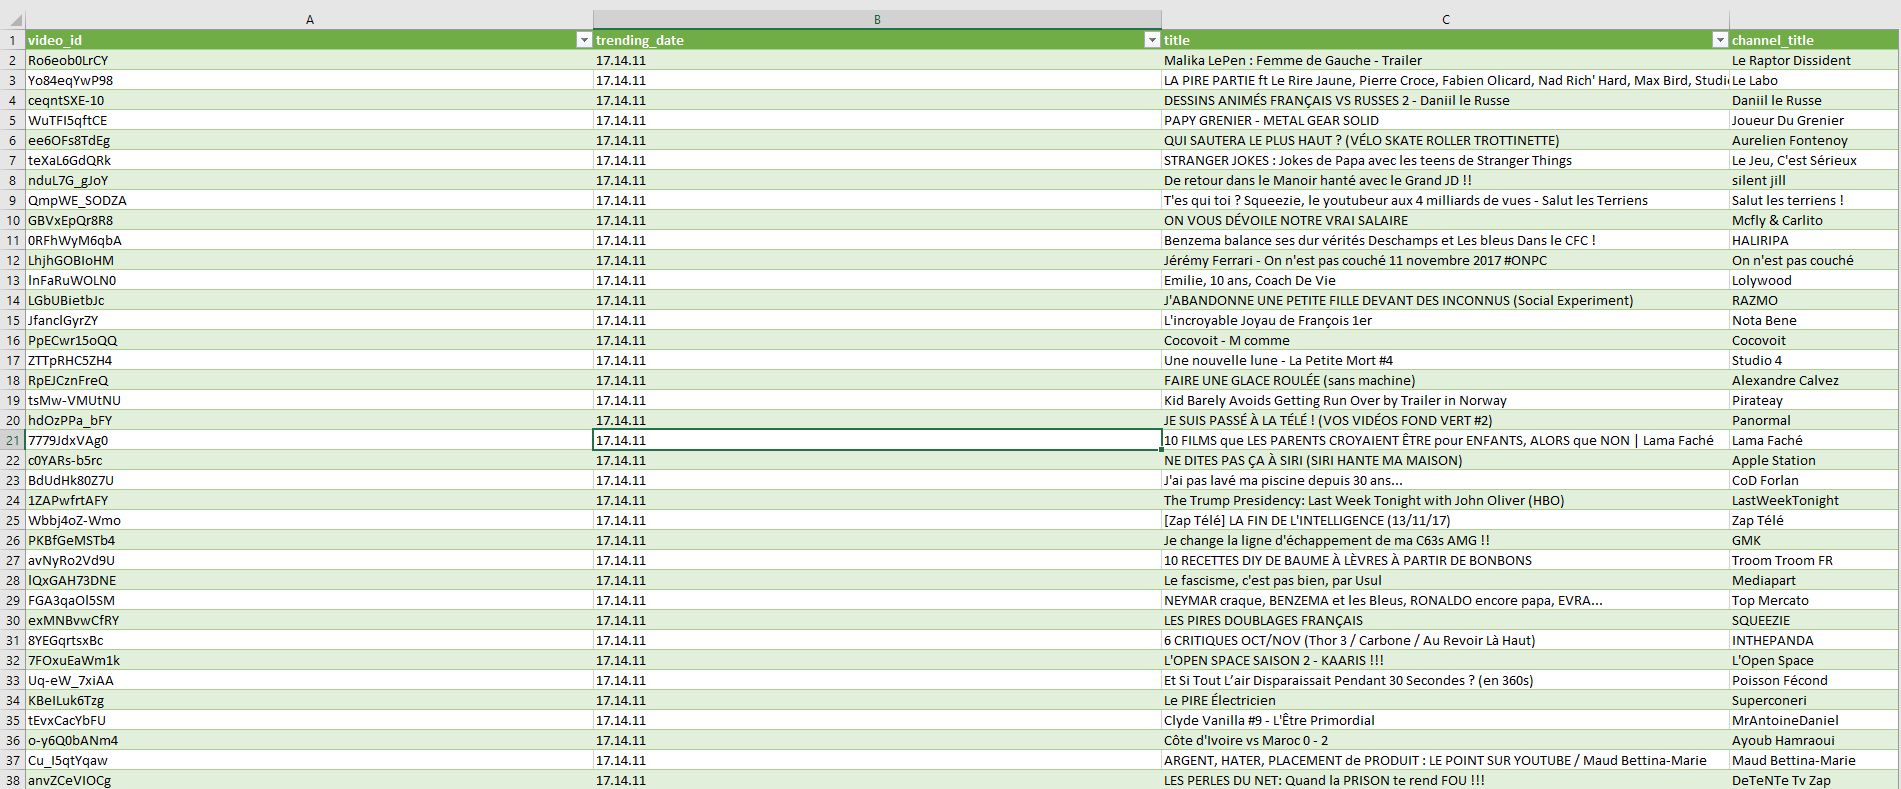

__Troisième étape: création du code de repérage des valeurs abberantes:__

Pour repérer les valeurs aberrantes nous avons remarqué que sur la première colonne qui correspond au video_id, les valeurs dites correctes possèdent un video_id de 11 caractères ni plus ni moins. Nous avons donc ensuite réfléchis en amont au futur code que nous pourrions créer et nous avons définis que le code devrait parcourir toutes les lignes en restant sur la première colonne, en testant les video_id les unes après les autres. On initialise un compteur partant de 0 et rajoutant une unité a chaque fois que le code détecte une valeur abberrante. Ainsi on obtient le nombre de valeurs aberrantes et le code suivant :

Pour crée le code qui vérifie les valeurs nous avons procédé colonnes par colonnes en testant les données selon des 
critères précis.
Pour la vidéo_ID on s'est servis du nombre de caractère qui ne devait pas être différents de 6.
Pour la trending_date la date ne devais pas excédé 8 caractère et ne pas comprendre de lettres ou autre chose que le
caractère "." ou des chiffres.
Pour le title ne pouvant pas crée de critère précis nous avons juste vérifié que le champ ne soit pas vide.
Nous avont procédé de façon similaire que le title pour le channel_title.
Pour category_id on a vérifié que la valeur affiché soit comprise entre 1 et 99 compris.
Pour la catégorie publish_time nous avons vérifier si la date était compris dans les bon bornages c'est a dire 
12 mois pour le mois etc... Tandis que pour l'heure nous avons vérifié également le bornage entre 00.00 et 23.59
Pour la catégorie tags on a procédé comme pour le title.
Pour les views, likes, dislikes et comment_count on vérifie la non présence de nombre négatifs ou de case vide.
Pour le thumbnail_link on vérifie encore une fois comme le title.
Pour comments_disabled, ratings_disabled et video_error_or_removed on test si ça vaut autre chose que "FAUX" ou "VRAI"
ou si la case es vide. 